<a href="https://colab.research.google.com/github/Jordan-mackey/python_projects/blob/main/Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# For time series RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
# Import Keras: Timeseries generator
# produces time series batches used in training/testing the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import Keras: MinMaxScaler
# Used to preprocess or scale the data
from sklearn.preprocessing import MinMaxScaler

# Generate Data

In [ ]:
# Create a simple sine wave using numpy
x = np.linspace(0,64,1024)
y = np.sin(x)

In [ ]:
x

array([0.00000000e+00, 6.25610948e-02, 1.25122190e-01, ...,
       6.38748778e+01, 6.39374389e+01, 6.40000000e+01])

In [ ]:
y

array([0.        , 0.06252029, 0.12479597, ..., 0.86393146, 0.89372716,
       0.92002604])

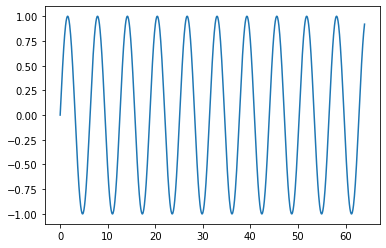

In [ ]:
plt.plot(x,y)

In [ ]:
# Load the data into a df
# Index: x; Data: y; column label; Sine

df = pd.DataFrame(data=y, index=x, columns=["Sine"])

In [ ]:
df.head(5)

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [ ]:
len(df)

1024

# Split Data --> Train/Test

In [ ]:
# Set percentage of data used for testing

test_percent = 0.2

In [ ]:
# Number of data points reserved for testing the model
# 20% of the original dataset

len(df)*test_percent

204.8

In [ ]:
# Need to find the length (number of data points) of the testing dataset
# It has been found above that around 205 data points are used for testing

test_length = np.round(len(df)*test_percent)

In [ ]:
test_length

205.0

In [ ]:
# The testing data set starts at this index
# Index starting with 0 

test_start_index = int(len(df) - test_length)

In [ ]:
test_start_index

819

In [ ]:
# Create separate training/testing datasets

# Training dataset: ALL the indices from start to test_start_index
# (excluding test_start_index)
data_train = df.iloc[: test_start_index]

# Testing dataset: ALl the indices from test_start_index to the end of the dataframe
# including test_start_index
data_test = df.iloc[test_start_index :]

In [ ]:
data_train.head(5)

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


# Normalize the Data (Scaled to range [0,1]

In [ ]:
# Create a MinMaxScaler to normalize the data
scaler = MinMaxScaler()

In [ ]:
# Ignore the warning: just converting the data to floats
# Only scale the TRAINING data - not the testing data

# Train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [ ]:
# Normalize the training dataset
normalized_train = scaler.transform(data_train)

# Normalize the testing dataset
normalized_test = scaler.transform(data_test)

# Create Timeseries Generator Instance

In [ ]:
# Timeseries Generator: Generate time series batches for training/testing

# Set the length of the input sequence 
# i.e., the number of time series steps that are used to predict the future one 
# Use 50 historical data points to predict the next one
length = 50

# batch_size: Number of time series samples in each batch
# One sample: each sample is a time series input sequence
# Only one sample in each batch
batch_size = 1

# Create a TimeSeriesGenerator for training: train_tzGenerator
# --) This time series generator produces time series batches used to train the model 
# Timeseries Generator (inputs dataset, outputs dataset, length, batch_size)

train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)


In [ ]:
# What does the first batch look like?
X,y = train_tsGenerator50[0]



In [ ]:
# Print X.flatten()
X.flatten()

array([0.49999882, 0.53125908, 0.56239703, 0.59329085, 0.62381964,
       0.65386398, 0.6833063 , 0.7120314 , 0.73992691, 0.76688367,
       0.79279621, 0.81756315, 0.84108759, 0.86327747, 0.88404598,
       0.90331187, 0.92099975, 0.93704041, 0.9513711 , 0.96393574,
       0.97468518, 0.98357735, 0.99057747, 0.99565814, 0.99879949,
       0.99998922, 0.99922268, 0.99650287, 0.99184044, 0.98525361,
       0.97676818, 0.96641732, 0.95424156, 0.94028851, 0.92461278,
       0.90727571, 0.88834511, 0.86789506, 0.84600558, 0.82276231,
       0.79825619, 0.7725831 , 0.7458435 , 0.718142  , 0.68958699,
       0.66029019, 0.63036624, 0.59993221, 0.56910717, 0.53801175])

In [ ]:
# Print y: What does X predict?

y

array([[0.50676759]])

# Build, Train, and Test Model

## Build Simple RNN Model

In [ ]:
# Dataset: Only one column/attripbute: Sine values of index 
# Features: How many features used to train the model: only one
n_features = 1

# define model 
model = Sequential()

# Add a simple RNN layer: Using SimpleRNN cells
# This layer has 100 neurons: One neuron for each input data point
# NOTES: # time series steps of the input sequence: 50
model.add(SimpleRNN(100, input_shape = (length, n_features)))

# Add a FC (fully-connected) layer for the final prediction
# Only one neuron of the dense/fully-connected layer
# Output: Predict the next data point of the input sequence: only one value
model.add(Dense(1))

# Compile Model

In [ ]:
# loss function: mse (mean squared errors)
# NOTES: why MSI? The data is real values/continuous: A regression problem 
# Optimizer: Adam
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


# Train (Fit) the Model

In [ ]:
# Fit the model
# Use fit_generator(), NOT fit()

model.fit_generator(train_tsGenerator50,epochs=5)

Epoch 1/5



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=8

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_IN

 11/769 [..............................] - ETA: 1:30 - loss: 0.1143

OMP: Info #212: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #210: KMP_AFFINITY: Affinity capable, using global cpuid leaf 11 info
OMP: Info #154: KMP_AFFINITY: Initial OS proc set respected: 0-7
OMP: Info #156: KMP_AFFINITY: 8 available OS procs
OMP: Info #157: KMP_AFFINITY: Uniform topology
OMP: Info #179: KMP_AFFINITY: 1 packages x 4 cores/pkg x 2 threads/core (4 total cores)
OMP: Info #214: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #171: KMP_AFFINITY: OS proc 0 maps to package 0 core 0 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 4 maps to package 0 core 0 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 1 maps to package 0 core 1 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 5 maps to package 0 core 1 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 2 maps to package 0 core 2 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 6 maps to package 0 core 2 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 3 maps to package 0 core 3 thread 0 
OMP: Info #171: KMP_AFFINITY: O

769/769 [==============================] - 15s 19ms/step - loss: 0.0031
Epoch 2/5
769/769 [==============================] - 14s 18ms/step - loss: 2.5193e-04
Epoch 3/5
769/769 [==============================] - 14s 18ms/step - loss: 1.6716e-04
Epoch 4/5
769/769 [==============================] - 14s 18ms/step - loss: 8.9303e-05
Epoch 5/5
769/769 [==============================] - 14s 18ms/step - loss: 2.4175e-04


# Visualize the Model's Performance After Training

<AxesSubplot:>

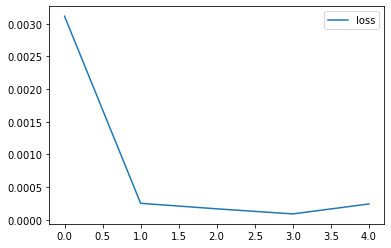

In [ ]:
# Load the loss data (model.history.history) into a dataframe
df_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()
df_model_loss.plot()

# Evaluate the Model on Test Data

## A Sneak Peek into the Test Data

In [ ]:
# Number of time steps of the input time series
length

50

In [ ]:
# Take a sneak peek into the 1st tie series batch (50 data points)
# array[-length:]: A sequence of [50th to the last .. last]
first_eval_batch = normalized_train[-length : ]

first_eval_batch

array([[8.31976169e-02],
       [6.67457884e-02],
       [5.19891118e-02],
       [3.89853243e-02],
       [2.77853048e-02],
       [1.84328746e-02],
       [1.09646261e-02],
       [5.40977978e-03],
       [1.79006951e-03],
       [1.19657859e-04],
       [4.05080501e-04],
       [2.64522069e-03],
       [6.83131362e-03],
       [1.29469807e-02],
       [2.09682938e-02],
       [3.08638684e-02],
       [4.25949871e-02],
       [5.61157506e-02],
       [7.13732572e-02],
       [8.83078103e-02],
       [1.06853151e-01],
       [1.26936720e-01],
       [1.48479936e-01],
       [1.71398511e-01],
       [1.95602771e-01],
       [2.20998016e-01],
       [2.47484883e-01],
       [2.74959740e-01],
       [3.03315088e-01],
       [3.32439984e-01],
       [3.62220472e-01],
       [3.92540034e-01],
       [4.23280041e-01],
       [4.54320219e-01],
       [4.85539119e-01],
       [5.16814595e-01],
       [5.48024277e-01],
       [5.79046054e-01],
       [6.09758550e-01],
       [6.40041598e-01],


In [ ]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

first_eval_batch

array([[[8.31976169e-02],
        [6.67457884e-02],
        [5.19891118e-02],
        [3.89853243e-02],
        [2.77853048e-02],
        [1.84328746e-02],
        [1.09646261e-02],
        [5.40977978e-03],
        [1.79006951e-03],
        [1.19657859e-04],
        [4.05080501e-04],
        [2.64522069e-03],
        [6.83131362e-03],
        [1.29469807e-02],
        [2.09682938e-02],
        [3.08638684e-02],
        [4.25949871e-02],
        [5.61157506e-02],
        [7.13732572e-02],
        [8.83078103e-02],
        [1.06853151e-01],
        [1.26936720e-01],
        [1.48479936e-01],
        [1.71398511e-01],
        [1.95602771e-01],
        [2.20998016e-01],
        [2.47484883e-01],
        [2.74959740e-01],
        [3.03315088e-01],
        [3.32439984e-01],
        [3.62220472e-01],
        [3.92540034e-01],
        [4.23280041e-01],
        [4.54320219e-01],
        [4.85539119e-01],
        [5.16814595e-01],
        [5.48024277e-01],
        [5.79046054e-01],
        [6.0

In [ ]:
first_eval_batch.shape

(1, 50, 1)

# Evaluate Model

In [ ]:
# All the code for evaluation

# Declare a list to store all the predictions
# Similar to: test_predictions = list();
test_predictions = []

# Get the first time series batch for testing
# The 1st batch: the 1st time series input sequence
# = the last 50 data points of the train data set
first_eval_batch = normalized_train[-length:]

# Reshape the batch into 3D array: #samples/batch x length x #features
current_batch = first_eval_batch.reshape((1, length, n_features))

# Run a FOR loop to make a prediction for each batch 
for i in range(len(data_test)):
    
    # Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]
    
    #store prediction into the list of predictions
    test_predictions.append(current_pred)
    
    # Generate a new batch to prepare for the next iteration of testing 
    # --) Drop the first dat point of the current input seqauence
    # --) Append the newly-predicted value to the tail of the input sequence
    # --) Maintain the number of time series steds: 50
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
# Convert the scaled result back to the real values
true_predictions = scaler.inverse_transform(test_predictions)

true_predictions

array([[ 8.19079918e-01],
       [ 8.50891275e-01],
       [ 8.76388379e-01],
       [ 8.95979160e-01],
       [ 9.12610464e-01],
       [ 9.23072470e-01],
       [ 9.28708069e-01],
       [ 9.30573329e-01],
       [ 9.26615238e-01],
       [ 9.17834195e-01],
       [ 9.05064901e-01],
       [ 8.87576725e-01],
       [ 8.65976916e-01],
       [ 8.39660252e-01],
       [ 8.09751348e-01],
       [ 7.75745594e-01],
       [ 7.37728463e-01],
       [ 6.96594258e-01],
       [ 6.51635357e-01],
       [ 6.03062758e-01],
       [ 5.51518999e-01],
       [ 4.96810244e-01],
       [ 4.38630367e-01],
       [ 3.78006708e-01],
       [ 3.14262876e-01],
       [ 2.47574229e-01],
       [ 1.78229370e-01],
       [ 1.06257267e-01],
       [ 3.14434636e-02],
       [-4.58265188e-02],
       [-1.25537898e-01],
       [-2.08009201e-01],
       [-2.92694093e-01],
       [-3.79712736e-01],
       [-4.69199838e-01],
       [-5.60921836e-01],
       [-6.54384254e-01],
       [-7.50224904e-01],
       [-8.4

In [ ]:
data_test

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
...,...
63.749756,0.794329
63.812317,0.830756
63.874878,0.863931
63.937439,0.893727


In [ ]:
# Copy the true values of predictions into the data frame of original test data
# Add it as another column

data_test['Predictions'] = true_predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data_test

,Sine,Predictions
51.237537,0.826045,0.819080
51.300098,0.859666,0.850891
51.362659,0.889923,0.876388
51.425220,0.916698,0.895979
51.487781,0.939887,0.912610
...,...,...
63.749756,0.794329,-2.729157
63.812317,0.830756,-2.730205
63.874878,0.863931,-2.726977
63.937439,0.893727,-2.719672


<AxesSubplot:>

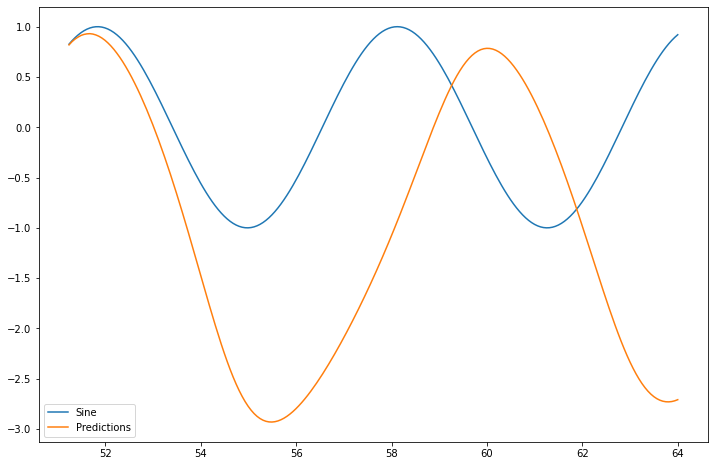

In [ ]:
# Visualize the data of the updated test data
# Compare teh predicted sine wave against the original sine wave

data_test.plot(figsize=(12,8))